In [1]:
import pandas as pd
import seaborn as sns

In [2]:
news_df= pd.read_csv("all-the-news-2-1.csv",low_memory=False)

# Cleaning

In [3]:
# Let us remove the first two columns
news_df.drop(columns=news_df.columns[:2],axis=1,inplace=True)
news_df

,date,year,month,day,author,title,article,url,section,publication
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox
1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider
2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters
3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters
4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,NaN,TMZ
...,...,...,...,...,...,...,...,...,...,...
2688874,2020-04-01 00:00:00,2020,4.0,1,NaN,Florida Ammo Selling Out On Heels of Stay-At-H...,Florida residents are gunning for all the ammo...,https://www.tmz.com/2020/04/01/florida-ammo-se...,NaN,TMZ
2688875,2020-04-01 00:00:00,2020,4.0,1,NaN,Disney Forcing Annual Pass Holders to Continue...,Disney isn't letting its most loyal customers ...,https://www.tmz.com/2020/04/01/disney-forcing-...,NaN,TMZ
2688876,2020-04-01 00:00:00,2020,4.0,1,NaN,Nick Cannon Pimps Out His Impala with Custom N...,Nick Cannon still has Nipsey Hussle in his tho...,https://www.tmz.com/2020/04/01/nick-cannon-imp...,NaN,TMZ
2688877,2020-04-01 00:00:00,2020,4.0,1,NaN,Pete Buttigieg Says Governors Showing More Lea...,Pete Buttigieg says it's inspiring to see the ...,https://www.tmz.com/2020/04/01/pete-buttigieg-...,NaN,TMZ


In [4]:
# Some articles are missing:
news_df[news_df.publication.isna()==True]

,date,year,month,day,author,title,article,url,section,publication
2312234,2019-03-08 00:00:00,2019,3.0,8,NaN,Book review of,NaN,NaN,NaN,NaN
2312235,2019-03-08 00:00:00,2019,3.0,8,NaN,Book review of,NaN,NaN,NaN,NaN
2312236,2019-03-08 00:00:00,2019,3.0,8,NaN,Book review of,NaN,NaN,NaN,NaN
2312237,2019-03-08 00:00:00,2019,3.0,8,NaN,Book review of,NaN,NaN,NaN,NaN
2312238,2019-03-08 00:00:00,2019,3.0,8,NaN,Book review of,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2324807,2019-03-08 00:00:00,2019,3.0,8,NaN,Book review of,NaN,NaN,NaN,NaN
2324808,2019-03-08 00:00:00,2019,3.0,8,NaN,Book review of,NaN,NaN,NaN,NaN
2324809,2019-03-08 00:00:00,2019,3.0,8,NaN,Book review of,NaN,NaN,NaN,NaN
2324810,2019-03-08 00:00:00,2019,3.0,8,NaN,Book review of,NaN,NaN,NaN,NaN


In [5]:
# Let us drop the rows with missing articles
news_df.drop(news_df[news_df.article.isna()==True].index,inplace=True)
news_df

,date,year,month,day,author,title,article,url,section,publication
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox
1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider
2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters
3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters
4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,NaN,TMZ
...,...,...,...,...,...,...,...,...,...,...
2688874,2020-04-01 00:00:00,2020,4.0,1,NaN,Florida Ammo Selling Out On Heels of Stay-At-H...,Florida residents are gunning for all the ammo...,https://www.tmz.com/2020/04/01/florida-ammo-se...,NaN,TMZ
2688875,2020-04-01 00:00:00,2020,4.0,1,NaN,Disney Forcing Annual Pass Holders to Continue...,Disney isn't letting its most loyal customers ...,https://www.tmz.com/2020/04/01/disney-forcing-...,NaN,TMZ
2688876,2020-04-01 00:00:00,2020,4.0,1,NaN,Nick Cannon Pimps Out His Impala with Custom N...,Nick Cannon still has Nipsey Hussle in his tho...,https://www.tmz.com/2020/04/01/nick-cannon-imp...,NaN,TMZ
2688877,2020-04-01 00:00:00,2020,4.0,1,NaN,Pete Buttigieg Says Governors Showing More Lea...,Pete Buttigieg says it's inspiring to see the ...,https://www.tmz.com/2020/04/01/pete-buttigieg-...,NaN,TMZ


In [6]:
# Let us look at what else is missing
news_df.isna().sum()

date                0
year                0
month               0
day                 0
author         924621
title              16
article             0
url                 0
section        830754
publication         0
dtype: int64

In [7]:
# Let us complete the database
news_df['author'].fillna('unknown',inplace=True)
news_df['section'].fillna('unknown',inplace=True)
news_df['title'].fillna('unknown',inplace=True)
news_df.isna().sum()

date           0
year           0
month          0
day            0
author         0
title          0
article        0
url            0
section        0
publication    0
dtype: int64

In [41]:
# This function looks for noise in the text (suspicious characters)
import re
RE_SUSPICIOUS = re.compile(r'[&#<>{}\[\]\\]')

def impurity(text, min_len=10):
    """returns the share of suspicious characters in a text"""
    if text == None or len(text) < min_len:
        return 0
    else:
        return len(RE_SUSPICIOUS.findall(text))/len(text)

In [42]:
# This adds a column for impurity
news_df['impurity']=news_df['article'].apply(impurity)
news_df

,date,year,month,day,author,title,article,url,section,publication,impurity
0,2016-12-23 00:00:00,2016,12,23,"David Nather,",How Obamacare replacement shifts the balance o...,"When Obamacare passed Congress, the Democrats ...",https://www.axios.com/how-obamacare-replacemen...,unknown,Axios,0.000232
1,2016-12-23 00:00:00,2016,12,23,Justin Green,The ‘One-China’ policy is why U.S. presidents ...,The governments of China and Taiwan each claim...,https://www.axios.com/the-one-china-policy-is-...,unknown,Axios,0.000000
2,2016-12-23 00:00:00,2016,12,23,Justin Green,"Trump calls Putin’s Christmas wishes ""very nic...",Trump's team shared Friday a message they rece...,https://www.axios.com/trump-calls-putins-chris...,unknown,Axios,0.000000
3,2016-12-23 00:00:00,2016,12,23,David Nather,Obamacare signups surge in going-out-of-busine...,Obamacare enrollment for next year now stands ...,https://www.axios.com/obamacare-signups-surge-...,unknown,Axios,0.000000
4,2016-12-27 00:00:00,2016,12,27,David Nather,Trump’s Medicaid chief wants poor to pay for h...,It’s pretty clear from this NPR profile of See...,https://www.axios.com/trumps-medicaid-chief-wa...,unknown,Axios,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2584160,2020-03-30 00:00:00,2020,3,30,Aarian Marshall,The Covid-19 Pandemic Aggravates Disputes Arou...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/covid-19-pandemic-...,transportation,Wired,0.000325
2584161,2020-03-30 00:00:00,2020,3,30,Sidney Fussell,A Wearable for Opioid Patients Gets Retooled f...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/wearable-opiod-pat...,business,Wired,0.000373
2584162,2020-03-30 00:00:00,2020,3,30,Steven Levy,Facebook Could Help Journalism by Making News ...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/facebook-journalis...,business,Wired,0.000000
2584163,2020-03-30 00:00:00,2020,3,30,Adrienne So,"Best Kids Tablets (2020): iPad Mini, Fire Tabl...","To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/gallery/best-kids-tablets,gear,Wired,0.000000


In [11]:
# Get top twenty records
news_df[['article','impurity']].sort_values(by='impurity',ascending=False).head(20)
# Maybe let us remove some articles with a certain degree of impurity?

,article,impurity
1333975,#### The Computational Future,0.133333
118912,He's dead. [AP],0.133333
760448,Scantrons are the bane of any student's existe...,0.115512
2685601,You know what time it is.. corona time ##lifea...,0.111317
1967806,finesse •\fə-ˈnes\• noun,0.083333
1967813,mosaic •\mō-ˈzā-ik\• noun,0.080000
1917333,"More than 236,000 people shared it in 2016. # ...",0.078818
1915512,#NotAllClowns,0.076923
2685329,Many universities and high schools have closed...,0.069701
1131571,"If you enjoy pimple-popper videos in theory, b...",0.068213


In [54]:
# Let us remove the 'impurity' column
news_df.drop('impurity',inplace=True,axis=1)
news_df

,date,year,month,day,author,title,article,url,section,publication
0,2016-12-23 00:00:00,2016,12,23,"David Nather,",How Obamacare replacement shifts the balance o...,"When Obamacare passed Congress, the Democrats ...",https://www.axios.com/how-obamacare-replacemen...,unknown,Axios
1,2016-12-23 00:00:00,2016,12,23,Justin Green,The ‘One-China’ policy is why U.S. presidents ...,The governments of China and Taiwan each claim...,https://www.axios.com/the-one-china-policy-is-...,unknown,Axios
2,2016-12-23 00:00:00,2016,12,23,Justin Green,"Trump calls Putin’s Christmas wishes ""very nic...",Trump's team shared Friday a message they rece...,https://www.axios.com/trump-calls-putins-chris...,unknown,Axios
3,2016-12-23 00:00:00,2016,12,23,David Nather,Obamacare signups surge in going-out-of-busine...,Obamacare enrollment for next year now stands ...,https://www.axios.com/obamacare-signups-surge-...,unknown,Axios
4,2016-12-27 00:00:00,2016,12,27,David Nather,Trump’s Medicaid chief wants poor to pay for h...,It’s pretty clear from this NPR profile of See...,https://www.axios.com/trumps-medicaid-chief-wa...,unknown,Axios
...,...,...,...,...,...,...,...,...,...,...
2584160,2020-03-30 00:00:00,2020,3,30,Aarian Marshall,The Covid-19 Pandemic Aggravates Disputes Arou...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/covid-19-pandemic-...,transportation,Wired
2584161,2020-03-30 00:00:00,2020,3,30,Sidney Fussell,A Wearable for Opioid Patients Gets Retooled f...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/wearable-opiod-pat...,business,Wired
2584162,2020-03-30 00:00:00,2020,3,30,Steven Levy,Facebook Could Help Journalism by Making News ...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/facebook-journalis...,business,Wired
2584163,2020-03-30 00:00:00,2020,3,30,Adrienne So,"Best Kids Tablets (2020): iPad Mini, Fire Tabl...","To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/gallery/best-kids-tablets,gear,Wired


In [8]:
# Recast the columns 'year', 'month', and 'day' as integers
news_df['year']=news_df['year'].astype(int)
news_df['month']=news_df['month'].astype(int)
news_df['day']=news_df['day'].astype(int)
news_df.dtypes

date           object
year            int64
month           int64
day             int64
author         object
title          object
article        object
url            object
section        object
publication    object
dtype: object

In [9]:
# Sort according to year, publication, month, and day
news_df.sort_values(by=['year','publication','month','day'],ascending=[True,True,True,True],
                    na_position='first',inplace=True)
news_df

,date,year,month,day,author,title,article,url,section,publication
281050,2016-12-23 00:00:00,2016,12,23,"David Nather,",How Obamacare replacement shifts the balance o...,"When Obamacare passed Congress, the Democrats ...",https://www.axios.com/how-obamacare-replacemen...,unknown,Axios
281051,2016-12-23 00:00:00,2016,12,23,Justin Green,The ‘One-China’ policy is why U.S. presidents ...,The governments of China and Taiwan each claim...,https://www.axios.com/the-one-china-policy-is-...,unknown,Axios
281064,2016-12-23 00:00:00,2016,12,23,Justin Green,"Trump calls Putin’s Christmas wishes ""very nic...",Trump's team shared Friday a message they rece...,https://www.axios.com/trump-calls-putins-chris...,unknown,Axios
281066,2016-12-23 00:00:00,2016,12,23,David Nather,Obamacare signups surge in going-out-of-busine...,Obamacare enrollment for next year now stands ...,https://www.axios.com/obamacare-signups-surge-...,unknown,Axios
281067,2016-12-27 00:00:00,2016,12,27,David Nather,Trump’s Medicaid chief wants poor to pay for h...,It’s pretty clear from this NPR profile of See...,https://www.axios.com/trumps-medicaid-chief-wa...,unknown,Axios
...,...,...,...,...,...,...,...,...,...,...
2672231,2020-03-30 00:00:00,2020,3,30,Aarian Marshall,The Covid-19 Pandemic Aggravates Disputes Arou...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/covid-19-pandemic-...,transportation,Wired
2672233,2020-03-30 00:00:00,2020,3,30,Sidney Fussell,A Wearable for Opioid Patients Gets Retooled f...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/wearable-opiod-pat...,business,Wired
2672236,2020-03-30 00:00:00,2020,3,30,Steven Levy,Facebook Could Help Journalism by Making News ...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/facebook-journalis...,business,Wired
2672238,2020-03-30 00:00:00,2020,3,30,Adrienne So,"Best Kids Tablets (2020): iPad Mini, Fire Tabl...","To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/gallery/best-kids-tablets,gear,Wired


In [23]:
# And reset the indices
news_df.reset_index(drop=True,inplace=True)
news_df

,date,year,month,day,author,title,article,url,section,publication
0,2016-12-23 00:00:00,2016,12,23,"David Nather,",How Obamacare replacement shifts the balance o...,"When Obamacare passed Congress, the Democrats ...",https://www.axios.com/how-obamacare-replacemen...,unknown,Axios
1,2016-12-23 00:00:00,2016,12,23,Justin Green,The ‘One-China’ policy is why U.S. presidents ...,The governments of China and Taiwan each claim...,https://www.axios.com/the-one-china-policy-is-...,unknown,Axios
2,2016-12-23 00:00:00,2016,12,23,Justin Green,"Trump calls Putin’s Christmas wishes ""very nic...",Trump's team shared Friday a message they rece...,https://www.axios.com/trump-calls-putins-chris...,unknown,Axios
3,2016-12-23 00:00:00,2016,12,23,David Nather,Obamacare signups surge in going-out-of-busine...,Obamacare enrollment for next year now stands ...,https://www.axios.com/obamacare-signups-surge-...,unknown,Axios
4,2016-12-27 00:00:00,2016,12,27,David Nather,Trump’s Medicaid chief wants poor to pay for h...,It’s pretty clear from this NPR profile of See...,https://www.axios.com/trumps-medicaid-chief-wa...,unknown,Axios
...,...,...,...,...,...,...,...,...,...,...
2584160,2020-03-30 00:00:00,2020,3,30,Aarian Marshall,The Covid-19 Pandemic Aggravates Disputes Arou...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/covid-19-pandemic-...,transportation,Wired
2584161,2020-03-30 00:00:00,2020,3,30,Sidney Fussell,A Wearable for Opioid Patients Gets Retooled f...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/wearable-opiod-pat...,business,Wired
2584162,2020-03-30 00:00:00,2020,3,30,Steven Levy,Facebook Could Help Journalism by Making News ...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/facebook-journalis...,business,Wired
2584163,2020-03-30 00:00:00,2020,3,30,Adrienne So,"Best Kids Tablets (2020): iPad Mini, Fire Tabl...","To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/gallery/best-kids-tablets,gear,Wired


# Some preliminary exploration

In [10]:
news_df[['author','section','publication']].describe()

,author,section,publication
count,2584165,2584165,2584165
unique,137687,7368,26
top,unknown,unknown,Reuters
freq,924621,830760,825136


In [11]:
news_df.publication.value_counts()

Reuters               825136
The New York Times    249086
CNBC                  234141
The Hill              208411
People                135691
CNN                   125300
Vice                  100986
Mashable               94107
Refinery 29            87111
Business Insider       57934
TechCrunch             52051
The Verge              51556
TMZ                    49504
Axios                  47311
Vox                    47265
Politico               46235
Buzzfeed News          32724
Gizmodo                27226
Economist              23200
Wired                  20185
Fox News               20144
Vice News              15539
Hyperallergic          13539
New Republic           11807
New Yorker              4644
Washington Post         3332
Name: publication, dtype: int64

In [12]:
news_df.section.value_counts()

unknown                                                               830760
World News                                                            108650
Market News                                                           106251
Business News                                                          96390
Wires                                                                  66013
                                                                       ...  
weekly-news-quiz-march-8-14-2016                                           1
news-qs-modeled-after-ants-teams-of-tiny-robots-can-move-2-ton-car         1
ohio-voters-explain-themselves                                             1
a-new-kind-of-substance-abuse-donald-trump-on-the-issues                   1
GoFundMe                                                                   1
Name: section, Length: 7368, dtype: int64

In [21]:
news_df['length']=news_df['article'].str.len()
news_df

,date,year,month,day,author,title,article,url,section,publication,length
0,2016-12-23 00:00:00,2016,12,23,"David Nather,",How Obamacare replacement shifts the balance o...,"When Obamacare passed Congress, the Democrats ...",https://www.axios.com/how-obamacare-replacemen...,unknown,Axios,4318
1,2016-12-23 00:00:00,2016,12,23,Justin Green,The ‘One-China’ policy is why U.S. presidents ...,The governments of China and Taiwan each claim...,https://www.axios.com/the-one-china-policy-is-...,unknown,Axios,1112
2,2016-12-23 00:00:00,2016,12,23,Justin Green,"Trump calls Putin’s Christmas wishes ""very nic...",Trump's team shared Friday a message they rece...,https://www.axios.com/trump-calls-putins-chris...,unknown,Axios,1120
3,2016-12-23 00:00:00,2016,12,23,David Nather,Obamacare signups surge in going-out-of-busine...,Obamacare enrollment for next year now stands ...,https://www.axios.com/obamacare-signups-surge-...,unknown,Axios,1137
4,2016-12-27 00:00:00,2016,12,27,David Nather,Trump’s Medicaid chief wants poor to pay for h...,It’s pretty clear from this NPR profile of See...,https://www.axios.com/trumps-medicaid-chief-wa...,unknown,Axios,1137
...,...,...,...,...,...,...,...,...,...,...,...
2584160,2020-03-30 00:00:00,2020,3,30,Aarian Marshall,The Covid-19 Pandemic Aggravates Disputes Arou...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/covid-19-pandemic-...,transportation,Wired,6162
2584161,2020-03-30 00:00:00,2020,3,30,Sidney Fussell,A Wearable for Opioid Patients Gets Retooled f...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/wearable-opiod-pat...,business,Wired,5360
2584162,2020-03-30 00:00:00,2020,3,30,Steven Levy,Facebook Could Help Journalism by Making News ...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/facebook-journalis...,business,Wired,5617
2584163,2020-03-30 00:00:00,2020,3,30,Adrienne So,"Best Kids Tablets (2020): iPad Mini, Fire Tabl...","To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/gallery/best-kids-tablets,gear,Wired,4749


(0.0, 10000.0)

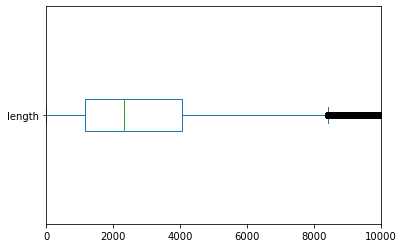

In [22]:
ax=news_df['length'].plot(kind='box',vert=False)
ax.set_xlim(0,10000)

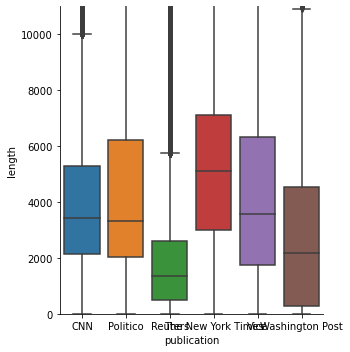

In [23]:
where =news_df['publication'].isin(['Reuters','The New York Times','Politico','Washington Post','CNN','Vice'])
ax=sns.catplot(data=news_df[where],x="publication",y="length",kind='box')
ax.set(ylim=(0,11000))

In [20]:
news_df.loc[news_df.publication=='Vox']

,date,year,month,day,author,title,article,url,section,publication
27862,2016-01-01 14:30:02,2016,1,1,German Lopez,The biggest moments for LGBTQ rights in 2015,The past year was tremendous for LGBTQ people ...,https://www.vox.com/2016/1/1/10697238/gay-righ...,unknown,Vox
29130,2016-01-01 14:00:02,2016,1,1,Michelle Hackman,Is Hillary Clinton “likable enough”? Science h...,A lot has been made in the media of Ted Cruz’s...,https://www.vox.com/2016/1/1/10695570/hillary-...,unknown,Vox
29986,2016-01-01 01:41:26,2016,1,1,Eric Johnson,"The Decode Series: Rufus Griscom, Heleo CEO",In an episode that originally aired on Re/code...,https://www.vox.com/2015/12/31/11684382/podcas...,unknown,Vox
30087,2016-01-01 15:30:02,2016,1,1,Emily Todd VanDerWerff,The best TV episodes of 2015: from Walking Dea...,Even in our era of streaming television and bi...,https://www.vox.com/2016/1/1/10695884/best-tv-...,unknown,Vox
31659,2016-01-01 17:00:03,2016,1,1,Emily Todd VanDerWerff,"2016 pop culture preview: Captain America, an ...",You're probably still reveling in all of the g...,https://www.vox.com/2016/1/1/10697328/2016-mov...,unknown,Vox
...,...,...,...,...,...,...,...,...,...,...
2674053,2020-03-31 16:30:00,2020,3,31,Jen Kirby,A field hospital in Central Park: Tuesday’s co...,The United States continues to record far and ...,https://www.vox.com/2020/3/31/21200997/coronav...,unknown,Vox
2674054,2020-03-31 18:50:00,2020,3,31,Sara Morrison,Coronavirus made Zoom popular but exposed priv...,"Zoom, the videoconferencing app that’s dominat...",https://www.vox.com/recode/2020/3/31/21201019/...,unknown,Vox
2674055,2020-03-31 20:30:00,2020,3,31,Katelyn Burns,Coronavirus staffing shortage: Governors plead...,Governors in several of the hardest-hit states...,https://www.vox.com/policy-and-politics/2020/3...,unknown,Vox
2674056,2020-03-31 23:50:00,2020,3,31,Shirin Ghaffary,Amazon fired a worker who protested coronaviru...,New York City’s Commission on Human Rights wil...,https://www.vox.com/recode/2020/3/31/21202075/...,unknown,Vox


In [15]:
news_df.publication.value_counts()

Reuters               825136
The New York Times    249086
CNBC                  234141
The Hill              208411
People                135691
CNN                   125300
Vice                  100986
Mashable               94107
Refinery 29            87111
Business Insider       57934
TechCrunch             52051
The Verge              51556
TMZ                    49504
Axios                  47311
Vox                    47265
Politico               46235
Buzzfeed News          32724
Gizmodo                27226
Economist              23200
Wired                  20185
Fox News               20144
Vice News              15539
Hyperallergic          13539
New Republic           11807
New Yorker              4644
Washington Post         3332
Name: publication, dtype: int64

# LSA or LDA

In [29]:
news_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584165 entries, 0 to 2584164
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   date         2584165 non-null  object
 1   year         2584165 non-null  int64 
 2   month        2584165 non-null  int64 
 3   day          2584165 non-null  int64 
 4   author       2584165 non-null  object
 5   title        2584165 non-null  object
 6   article      2584165 non-null  object
 7   url          2584165 non-null  object
 8   section      2584165 non-null  object
 9   publication  2584165 non-null  object
dtypes: int64(3), object(7)
memory usage: 197.2+ MB


In [53]:
print(repr(news_df.iloc[120]["article"]))
print()
print(repr(news_df.iloc[220]["article"]))

# Maybe remove some articles with a lot of '\'s ?

'BlackBerry\'s are famed for their security — even President Obama uses one. But police in the Netherlands allege that they are able to intercept and decrypt emails sent on some PGP BlackBerry phones — a type of BlackBerry that comes with PGP encryption software pre-installed by third-party vendors. "We are capable of obtaining encrypted data from BlackBerry PGP devices," a spokesperson for the Netherlands Forensic Institute (NFI) said to Motherboard. The police unit declined to provide any more information, saying that by doing so, "we would provide criminals with exactly the information they would need in order to eventually get around our research method. We would like to prevent that and therefore have been very reserved with our explanation towards the press." Motherboard\'s report was based on an earlier story from the Dutch site Crime News. The site apparently got hold of documents from the NFI, which say that the crack was able to open 279 of 325 encrypted emails it was tried o

In [55]:
import re
news_df["paragraphs"] = news_df["article"].map(lambda text: re.split('[.?!]\s*\n', text))
news_df

,date,year,month,day,author,title,article,url,section,publication,paragraphs
0,2016-12-23 00:00:00,2016,12,23,"David Nather,",How Obamacare replacement shifts the balance o...,"When Obamacare passed Congress, the Democrats ...",https://www.axios.com/how-obamacare-replacemen...,unknown,Axios,"[When Obamacare passed Congress, the Democrats..."
1,2016-12-23 00:00:00,2016,12,23,Justin Green,The ‘One-China’ policy is why U.S. presidents ...,The governments of China and Taiwan each claim...,https://www.axios.com/the-one-china-policy-is-...,unknown,Axios,[The governments of China and Taiwan each clai...
2,2016-12-23 00:00:00,2016,12,23,Justin Green,"Trump calls Putin’s Christmas wishes ""very nic...",Trump's team shared Friday a message they rece...,https://www.axios.com/trump-calls-putins-chris...,unknown,Axios,[Trump's team shared Friday a message they rec...
3,2016-12-23 00:00:00,2016,12,23,David Nather,Obamacare signups surge in going-out-of-busine...,Obamacare enrollment for next year now stands ...,https://www.axios.com/obamacare-signups-surge-...,unknown,Axios,[Obamacare enrollment for next year now stands...
4,2016-12-27 00:00:00,2016,12,27,David Nather,Trump’s Medicaid chief wants poor to pay for h...,It’s pretty clear from this NPR profile of See...,https://www.axios.com/trumps-medicaid-chief-wa...,unknown,Axios,[It’s pretty clear from this NPR profile of Se...
...,...,...,...,...,...,...,...,...,...,...,...
2584160,2020-03-30 00:00:00,2020,3,30,Aarian Marshall,The Covid-19 Pandemic Aggravates Disputes Arou...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/covid-19-pandemic-...,transportation,Wired,"[To revisit this article, select My⁠ ⁠Account,..."
2584161,2020-03-30 00:00:00,2020,3,30,Sidney Fussell,A Wearable for Opioid Patients Gets Retooled f...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/wearable-opiod-pat...,business,Wired,"[To revisit this article, select My⁠ ⁠Account,..."
2584162,2020-03-30 00:00:00,2020,3,30,Steven Levy,Facebook Could Help Journalism by Making News ...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/facebook-journalis...,business,Wired,"[To revisit this article, select My⁠ ⁠Account,..."
2584163,2020-03-30 00:00:00,2020,3,30,Adrienne So,"Best Kids Tablets (2020): iPad Mini, Fire Tabl...","To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/gallery/best-kids-tablets,gear,Wired,"[To revisit this article, select My⁠ ⁠Account,..."


In [59]:
news_df["number_of_paragraphs"] = news_df["paragraphs"].map(len)
news_df

,date,year,month,day,author,title,article,url,section,publication,paragraphs,number_of_paragraphs
0,2016-12-23 00:00:00,2016,12,23,"David Nather,",How Obamacare replacement shifts the balance o...,"When Obamacare passed Congress, the Democrats ...",https://www.axios.com/how-obamacare-replacemen...,unknown,Axios,"[When Obamacare passed Congress, the Democrats...",1
1,2016-12-23 00:00:00,2016,12,23,Justin Green,The ‘One-China’ policy is why U.S. presidents ...,The governments of China and Taiwan each claim...,https://www.axios.com/the-one-china-policy-is-...,unknown,Axios,[The governments of China and Taiwan each clai...,1
2,2016-12-23 00:00:00,2016,12,23,Justin Green,"Trump calls Putin’s Christmas wishes ""very nic...",Trump's team shared Friday a message they rece...,https://www.axios.com/trump-calls-putins-chris...,unknown,Axios,[Trump's team shared Friday a message they rec...,1
3,2016-12-23 00:00:00,2016,12,23,David Nather,Obamacare signups surge in going-out-of-busine...,Obamacare enrollment for next year now stands ...,https://www.axios.com/obamacare-signups-surge-...,unknown,Axios,[Obamacare enrollment for next year now stands...,1
4,2016-12-27 00:00:00,2016,12,27,David Nather,Trump’s Medicaid chief wants poor to pay for h...,It’s pretty clear from this NPR profile of See...,https://www.axios.com/trumps-medicaid-chief-wa...,unknown,Axios,[It’s pretty clear from this NPR profile of Se...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2584160,2020-03-30 00:00:00,2020,3,30,Aarian Marshall,The Covid-19 Pandemic Aggravates Disputes Arou...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/covid-19-pandemic-...,transportation,Wired,"[To revisit this article, select My⁠ ⁠Account,...",1
2584161,2020-03-30 00:00:00,2020,3,30,Sidney Fussell,A Wearable for Opioid Patients Gets Retooled f...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/wearable-opiod-pat...,business,Wired,"[To revisit this article, select My⁠ ⁠Account,...",1
2584162,2020-03-30 00:00:00,2020,3,30,Steven Levy,Facebook Could Help Journalism by Making News ...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/facebook-journalis...,business,Wired,"[To revisit this article, select My⁠ ⁠Account,...",1
2584163,2020-03-30 00:00:00,2020,3,30,Adrienne So,"Best Kids Tablets (2020): iPad Mini, Fire Tabl...","To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/gallery/best-kids-tablets,gear,Wired,"[To revisit this article, select My⁠ ⁠Account,...",1


In [61]:
news_df[['paragraphs','number_of_paragraphs']].sort_values(by='number_of_paragraphs',ascending=False).head(20)

,paragraphs,number_of_paragraphs
1416,[Mary Meeker of Kleiner Perkins Caufield & Bye...,427
1248858,[With their spending power estimated to surpas...,317
1374,[The digital media and advertising landscape i...,279
1249216,[Food trends may come and go — but there's not...,257
1082583,[\nI heard poorly rated @Morning_Joe speaks ba...,232
65,"[ Twenty-one years ago, in 1995, the internet ...",223
1794441,[Networks and streaming services are starting ...,218
611083,[ Some of these songs have gone down in the hi...,206
221,"[The Appalachian Trail, or AT, stretches more ...",201
613035,[Christmas traditions vary depending on weathe...,200


In [71]:
news_df.paragraphs[news_df.number_of_paragraphs==4]

7          [From time to time, all of us go looking for a...
81         [Despite the difficulties they faced entering ...
105        [Clayton Wilcox, superintendent of a public sc...
178        [Smoking marijuana does not make teenagers stu...
242        [The Insider Picks team writes about stuff we ...
                                 ...                        
2559515    [In 2020, both the radical and the realist mod...
2571293    [Technology from Amazon, Apple, Google, IBM an...
2580925    [Kevin Uhrmacher is a graphics editor for poli...
2583529    [Picture a calm river. Now picture a torrent o...
2584047    [“Mad Mike” Hughes died on February 22 when th...
Name: paragraphs, Length: 8044, dtype: object

In [72]:
# This way of identifying paragraphs does not seem to really work. Anything past the first paragraph seems to be garbage.
news_df.paragraphs[81]

["Despite the difficulties they faced entering the job market during the worst recession in decades, millennials have found their way into the workplace, even teaching older generations a thing or two about new ways to work along the way. But, financially, it's been a rough decade or so for the youngest generation of workers. All generations were impacted by the Great Recession, but millennials may have had it the worst. They shouldered crushing student loan debt as they vied for a scarce spot in the labor market, only to find low pay and staggeringly long hours once they landed one. As a result, many millennials have delayed personal and financial milestones such as marriage and home ownership, and they're even staying at home with family longer than young people have in about 75 years. So, it's not difficult to understand why millennials may be feeling a little less than optimistic about their likelihood of getting ahead once they've finally caught up. And, sadly, they might be right

In [73]:
# Let us drop the 'paragraphs' and 'number_of_paragraphs' sections.
news_df.drop(['paragraphs','number_of_paragraphs'],inplace=True,axis=1)
news_df

,date,year,month,day,author,title,article,url,section,publication
0,2016-12-23 00:00:00,2016,12,23,"David Nather,",How Obamacare replacement shifts the balance o...,"When Obamacare passed Congress, the Democrats ...",https://www.axios.com/how-obamacare-replacemen...,unknown,Axios
1,2016-12-23 00:00:00,2016,12,23,Justin Green,The ‘One-China’ policy is why U.S. presidents ...,The governments of China and Taiwan each claim...,https://www.axios.com/the-one-china-policy-is-...,unknown,Axios
2,2016-12-23 00:00:00,2016,12,23,Justin Green,"Trump calls Putin’s Christmas wishes ""very nic...",Trump's team shared Friday a message they rece...,https://www.axios.com/trump-calls-putins-chris...,unknown,Axios
3,2016-12-23 00:00:00,2016,12,23,David Nather,Obamacare signups surge in going-out-of-busine...,Obamacare enrollment for next year now stands ...,https://www.axios.com/obamacare-signups-surge-...,unknown,Axios
4,2016-12-27 00:00:00,2016,12,27,David Nather,Trump’s Medicaid chief wants poor to pay for h...,It’s pretty clear from this NPR profile of See...,https://www.axios.com/trumps-medicaid-chief-wa...,unknown,Axios
...,...,...,...,...,...,...,...,...,...,...
2584160,2020-03-30 00:00:00,2020,3,30,Aarian Marshall,The Covid-19 Pandemic Aggravates Disputes Arou...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/covid-19-pandemic-...,transportation,Wired
2584161,2020-03-30 00:00:00,2020,3,30,Sidney Fussell,A Wearable for Opioid Patients Gets Retooled f...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/wearable-opiod-pat...,business,Wired
2584162,2020-03-30 00:00:00,2020,3,30,Steven Levy,Facebook Could Help Journalism by Making News ...,"To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/story/facebook-journalis...,business,Wired
2584163,2020-03-30 00:00:00,2020,3,30,Adrienne So,"Best Kids Tablets (2020): iPad Mini, Fire Tabl...","To revisit this article, select My⁠ ⁠Account, ...",https://www.wired.com/gallery/best-kids-tablets,gear,Wired


# LDA

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
count_para_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)

In [78]:
count_para_vectors = count_para_vectorizer.fit_transform(news_df["article"])

/home/machine/anaconda3/envs/bootcamp/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


In [79]:
from sklearn.decomposition import LatentDirichletAllocation

In [80]:
lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

KeyboardInterrupt: 